In [24]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel('churn_df_data_numeric.xlsx')

### Create Dataframe Subset for Clustering

In [25]:
df1 = df.copy()

#### make this cell not markdown to evaluate full dataset
df2 = df1

In [26]:
# make this cell markdown to evaluate full dataset

# Create composite features instead of using all dummies and rename some features

df1['fiber_user'] = df1['internet_tech_Fiber Optic']
df1['dsl_user'] = df1['internet_tech_DSL']
df1['cable_user'] = df1['internet_tech_Cable']
df1['unknown_tech_user'] = df1['internet_tech_Unknown']


df1['multiple_phone_lines'] = df1['multi_line_Yes']

df1['month_to_month'] = df1['contract_term_Month-to-month']
df1['one_year'] = df1['contract_term_One year']
df1['two_year'] = df1['contract_term_Two year']

df1['auto_payment'] = (df1['pay_method_Bank transfer (automatic)'] +
                        df1['pay_method_Credit card (automatic)'])


# Final feature set
selected_features = [
    'tenure_mo', 
    'monthly_fee', 
    'num_add_ons',
    'avg_long_dist_fee', 
    'unlimited_data_opt', 
    'pay_method_Electronic check',
    'fiber_user', 
    'month_to_month',
    'age_years', 
    'auto_payment',
    'avg_gb_download'  
]

df2 = df1.filter(items=selected_features, axis=1) 

## Scale Data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
array_scaled = scaler.fit_transform(df2)

df_scaled = df2
pd.DataFrame(array_scaled, columns=df2.columns, index=df2.index)

,tenure_mo,monthly_fee,num_add_ons,avg_long_dist_fee,unlimited_data_opt,pay_method_Electronic check,fiber_user,month_to_month,age_years,auto_payment,avg_gb_download
0,-1.282753,-1.162056,-0.347302,-1.473199,0.692290,1.405601,-0.872181,0.905442,-0.637503,-0.878187,-0.513603
1,0.063427,-0.260594,0.261719,-0.369955,0.692290,-0.711440,-0.872181,-1.104433,-0.040595,-0.878187,-0.217322
2,-1.241960,-0.363713,0.261719,-0.797309,0.692290,-0.711440,-0.872181,0.905442,-0.577812,-0.878187,0.029579
3,0.512153,-0.747916,1.479762,-1.473199,0.692290,-0.711440,-0.872181,-1.104433,0.377240,1.138709,-0.513603
4,-1.241960,0.196791,-0.956324,-0.884458,0.692290,1.405601,1.146551,0.905442,-1.652246,-0.878187,1.510985
...,...,...,...,...,...,...,...,...,...,...,...
5631,-0.548473,0.462905,-0.956324,0.434399,0.692290,-0.711440,1.146551,0.905442,0.616003,1.138709,-0.365463
5632,-0.834027,-0.137516,1.479762,-1.473199,0.692290,1.405601,-0.872181,-1.104433,0.914457,-0.878187,0.177720
5633,1.613573,-1.451456,-0.956324,-0.003283,-1.444482,-0.711440,-0.872181,-1.104433,-0.995648,1.138709,-1.007405
5634,-1.160373,0.319869,-0.956324,-0.788271,-1.444482,-0.711440,1.146551,0.905442,1.690437,-0.878187,-0.612364


## Run K-Means

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=800)
labels = kmeans.fit_predict(df_scaled)

# Add cluster labels back to the dataframe
df_scaled['cluster'] = labels

#kmeans.cluster_centers_

In [29]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.drop(columns=['cluster']).columns)

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

sil = silhouette_score(df_scaled, labels)
db = davies_bouldin_score(df_scaled, labels)
ch = calinski_harabasz_score(df_scaled, labels)

print(f"Silhouette {sil:.3f}")
print(f"Davies-Bouldin {db:.3f}")
print(f"Calinski Harabasz {ch:.3f}")

print(f"{sil:.3f}")
print(f"{db:.3f}")
print(f"{ch:.3f}")

Silhouette 0.271
Davies-Bouldin 1.402
Calinski Harabasz 2426.795
0.271
1.402
2426.795


In [31]:
centers

,tenure_mo,monthly_fee,num_add_ons,avg_long_dist_fee,unlimited_data_opt,pay_method_Electronic check,fiber_user,month_to_month,age_years,auto_payment,avg_gb_download
0,29.581423,26.045899,0.405308,19.816508,0.227382,0.154403,-5.551115e-17,0.433655,44.442099,0.418577,4.740048
1,57.253110,89.825879,2.935641,24.195852,0.856138,0.305571,6.489995e-01,0.287723,47.687939,0.619794,27.114116
2,13.130108,73.203687,1.291686,23.966397,0.868953,0.503992,5.800845e-01,0.867074,47.547675,0.288398,26.767027


In [32]:
kmeans.n_iter_

12

In [33]:
print(silhouette_samples(df_scaled, labels==0).mean(),
      silhouette_samples(df_scaled, labels==1).mean(),
      silhouette_samples(df_scaled, labels==2).mean()
     )

0.2915901629311752 0.24412259352513835 0.13470574901657165


##  Segment Sizes

In [34]:
segment_sizes = pd.Series(labels).value_counts()
print(segment_sizes)

2    2129
1    1849
0    1658
Name: count, dtype: int64


In [35]:
kmeans.inertia_

7386778.322272867

## Plot

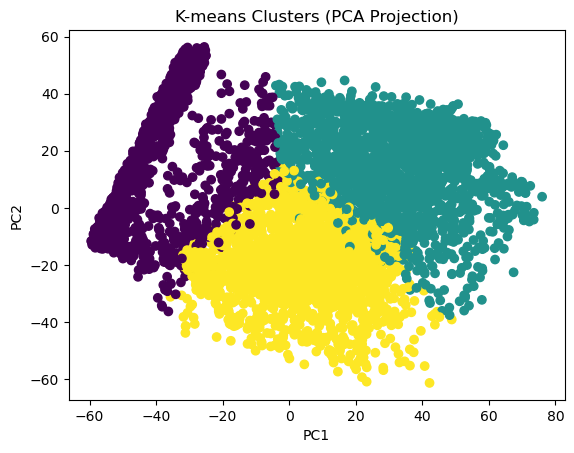

array([4.40033233e-01, 2.23733976e-01, 1.79343017e-01, 9.88477805e-02,
       5.71202803e-02, 6.38744715e-04, 1.28513096e-04, 5.69844455e-05,
       4.67278342e-05, 2.85238459e-05, 2.22199878e-05])

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df_scaled.drop(columns=['cluster']).values
pca = PCA(random_state=943)
X2 = pca.fit_transform(X)

plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=df_scaled['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clusters (PCA Projection)')
#plt.savefig("PCA_projection_FINAL", dpi = 400)
plt.show()

pca.explained_variance_ratio_



<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.13/site-packages/matplotlib/pyplot.py'>

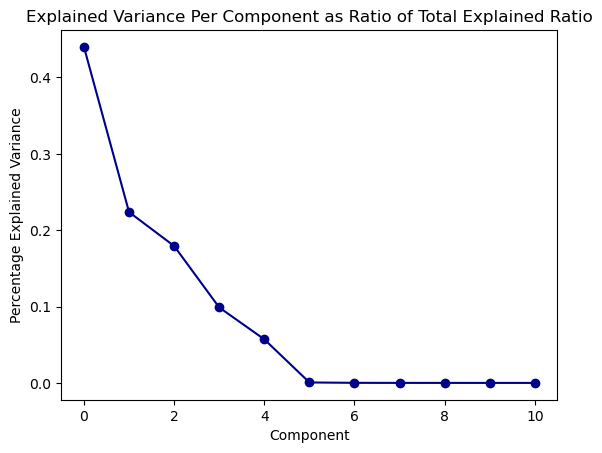

In [37]:
n = pd.DataFrame(pca.explained_variance_ratio_)
n.to_dict()


plt.figure()
plt.plot(n.index, n, 'o-', color="darkblue")
plt.title("Explained Variance Per Component as Ratio of Total Explained Ratio")

plt.xlabel("Component")
plt.ylabel("Percentage Explained Variance")

plt

In [38]:
# Feature Correlations

corr_matrix = df.corr()
corr_matrix_noresponse = df.drop(columns="left_flag").corr()
#corr_matrix_noresponse.to_excel('corr_matrix_noresponse.xlsx', index=False)

In [39]:
# Export Segmentation
#unscaled_centers.to_excel('segments.xlsx', index=False)

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [41]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / df_scaled.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 2439.9368785524603
2 : 1649.1374448916013
3 : 1310.6569381537226
4 : 1085.2368899029573
5 : 991.8094575742036
6 : 849.6782235638524
7 : 781.370476335904
8 : 727.8649721525085
9 : 698.6847940171876


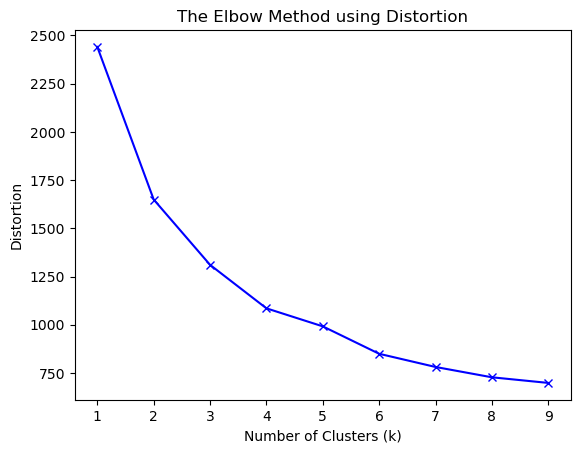

In [42]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()